In [1]:
%matplotlib inline
import wfdb
import matplotlib.pyplot as plt
import mne
import pyedflib
import numpy as np
import neurokit2 as nk
import pandas as pd
import os
import random
import neurokit2 as nk
from matplotlib import style
import matplotlib.pyplot as plt
import hrvanalysis as hrvana # RR interval processing package


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [135]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import torch.nn.functional as F

In [4]:
plt.style.use('bmh')

In [5]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [6]:
Data_Path = 'E:/PSG_Dataset/haaglanden-medisch-centrum-sleep-staging-database-1.1/recordings/'

In [7]:
#编号14与64号数据缺失，所以文件名称长度为151而不是153.
files = os.listdir(Data_Path)
print(files)
ECG_name_list = []
PSG_sleep_list=[]
for file in files:
    if file[-3:] == 'edf' and "_" not in file:
        ECG_name_list.append(file)
    if file[-3:] == 'txt':
        PSG_sleep_list.append(file)
print(len(files))

print(len(ECG_name_list))
print(ECG_name_list)

print(len(PSG_sleep_list))
print(PSG_sleep_list)

['SN001.edf', 'SN001_sleepscoring.edf', 'SN001_sleepscoring.txt', 'SN002.edf', 'SN002_sleepscoring.edf', 'SN002_sleepscoring.txt', 'SN003.edf', 'SN003_sleepscoring.edf', 'SN003_sleepscoring.txt', 'SN004.edf', 'SN004_sleepscoring.edf', 'SN004_sleepscoring.txt', 'SN005.edf', 'SN005_sleepscoring.edf', 'SN005_sleepscoring.txt', 'SN006.edf', 'SN006_sleepscoring.edf', 'SN006_sleepscoring.txt', 'SN007.edf', 'SN007_sleepscoring.edf', 'SN007_sleepscoring.txt', 'SN008.edf', 'SN008_sleepscoring.edf', 'SN008_sleepscoring.txt', 'SN009.edf', 'SN009_sleepscoring.edf', 'SN009_sleepscoring.txt', 'SN010.edf', 'SN010_sleepscoring.edf', 'SN010_sleepscoring.txt', 'SN011.edf', 'SN011_sleepscoring.edf', 'SN011_sleepscoring.txt', 'SN012.edf', 'SN012_sleepscoring.edf', 'SN012_sleepscoring.txt', 'SN013.edf', 'SN013_sleepscoring.edf', 'SN013_sleepscoring.txt', 'SN015.edf', 'SN015_sleepscoring.edf', 'SN015_sleepscoring.txt', 'SN016.edf', 'SN016_sleepscoring.edf', 'SN016_sleepscoring.txt', 'SN017.edf', 'SN017_slee

In [8]:
record_lines= []
for record_name in PSG_sleep_list:
    filename = Data_Path+record_name  # 替换为你的文件路径

# 打开文件并计算行数
    with open(filename, 'r') as file:
        line_count = sum(1 for line in file)
    record_lines.append(line_count)
print(record_lines)

[857, 859, 957, 1019, 962, 869, 1037, 850, 904, 927, 1144, 940, 1007, 870, 1091, 1117, 865, 843, 951, 959, 1005, 794, 860, 993, 886, 875, 905, 954, 1059, 776, 1191, 525, 890, 999, 811, 833, 930, 890, 804, 840, 1153, 1017, 974, 718, 714, 887, 1259, 804, 935, 932, 1014, 943, 501, 998, 1156, 779, 1052, 829, 945, 865, 473, 1243, 1042, 1013, 969, 844, 740, 675, 1093, 1061, 894, 848, 1092, 690, 857, 877, 1120, 892, 1151, 748, 1090, 879, 1009, 700, 838, 1009, 809, 910, 755, 1032, 781, 1053, 865, 719, 1053, 878, 850, 908, 922, 843, 987, 1010, 841, 678, 756, 885, 786, 964, 1080, 851, 895, 612, 860, 800, 764, 999, 919, 816, 1086, 848, 752, 1039, 1205, 802, 964, 929, 867, 517, 964, 1022, 998, 1182, 699, 1072, 1123, 735, 1314, 1068, 911, 945, 796, 788, 1025, 907, 869, 866, 592, 847, 1002, 905, 1006]


In [9]:
with open(Data_Path+'SN002_sleepscoring.txt', 'r') as f:
    first_line = f.readline()
    print(first_line)

Date, Time, Recording onset, Duration, Annotation, Linked channel



In [10]:
sub_ECG_name_list = random.choices(ECG_name_list, k=5)
print(sub_ECG_name_list)

['SN143.edf', 'SN130.edf', 'SN037.edf', 'SN067.edf', 'SN131.edf']


In [11]:
sub_PSG_list = [s[:5] + "_sleepscoring.txt" for s in sub_ECG_name_list]
print(sub_PSG_list)

['SN143_sleepscoring.txt', 'SN130_sleepscoring.txt', 'SN037_sleepscoring.txt', 'SN067_sleepscoring.txt', 'SN131_sleepscoring.txt']


In [12]:
ECG_singal_num_list = []
Singal_time_list = []
ECG_Singal_list = []

for name in sub_ECG_name_list:
    ECG_data = pyedflib.EdfReader(Data_Path + name)

    ECG_singal_num = ECG_data.signals_in_file
    ECG_singal_num_list.append(ECG_singal_num)
    
    time_duration=ECG_data.getFileDuration()
    Singal_time_list.append(time_duration)

    ECG_Singal = ECG_data.readSignal(7)
    ECG_Singal_list.append(ECG_Singal)

print(ECG_singal_num_list)
print(Singal_time_list)
print(ECG_Singal_list)

[8, 8, 8, 8, 8]
[28268, 15435, 24904, 28987, 28854]
[array([-15.19798581, -19.44609751, -12.2682536 , ...,  -0.03662165,
        -0.03662165,  -0.03662165]), array([24.71961547, 11.97528038, -9.41176471, ..., -0.03662165,
       -0.03662165, -0.03662165]), array([-7.98718242e+01, -7.55504692e+01, -7.65758755e+01, ...,
       -3.66216526e-02, -3.66216526e-02, -3.66216526e-02]), array([-1.41542687e+02, -1.07924010e+02, -5.28450446e+01, ...,
       -3.66216526e-02, -3.66216526e-02, -3.66216526e-02]), array([ 1.11494621e+03,  1.46409705e+03,  1.62200961e+03, ...,
       -3.66216526e-02, -3.66216526e-02, -3.66216526e-02])]


In [13]:
def get_txt_labels(filename_list):
    labels_list=[]
    for name in filename_list:
        with open(Data_Path+name, "r") as file:
            lines = file.readlines()

# 去除第三行和最后一行的最后一个字符
        lines = [line.strip() for i, line in enumerate(lines) if i !=0 and i != 3 and i != len(lines)-1]
        result = [line[-2] for line in lines]
        labels_list.append(result)
# # 存储为列表
#         result = [line[-1] for line in lines]
    return labels_list

In [14]:
PSG_Labels = get_txt_labels(sub_PSG_list)
print(PSG_Labels)
print(len(PSG_Labels))

for sub_list in PSG_Labels:
    print(len(sub_list))

[['W', 'W', 'W', '1', '1', '1', '2', '2', '2', '1', 'W', 'W', '1', '1', '1', '1', '2', 'W', 'W', 'W', 'W', '1', '2', '2', '2', '2', '2', '2', 'W', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', '1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', '1', '1', '1', 'W', 'W', '1', '1', '1', '1', '2', '2', '2', '2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', 'W', 'W', 'W', '1', '2', 'W', '1', '1', '2', '1', 'W', 'W', '1', '1', '1', '1', '1', '2', '2', 'W', '2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'

In [15]:
flattened_PSG_list = [item for sublist in PSG_Labels for item in sublist]
print(len(flattened_PSG_list))
print(flattened_PSG_list)

4213
['W', 'W', 'W', '1', '1', '1', '2', '2', '2', '1', 'W', 'W', '1', '1', '1', '1', '2', 'W', 'W', 'W', 'W', '1', '2', '2', '2', '2', '2', '2', 'W', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', '1', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', '1', '1', '1', 'W', 'W', '1', '1', '1', '1', '2', '2', '2', '2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', '1', 'W', 'W', 'W', '1', '2', 'W', '1', '1', '2', '1', 'W', 'W', '1', '1', '1', '1', '1', '2', '2', 'W', '2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',

In [16]:
def split_ecg_data(ecg_data, sampling_rate=256, segment_length=30):
    num_samples = len(ecg_data)
    num_segments = num_samples // (sampling_rate * segment_length)

    # 计算需要存储的组数
    num_groups = num_segments

    # 初始化存储数组
    ecg_segments = [None] * num_groups

    # 分割数据
    for i in range(num_segments):
        start = i * (sampling_rate * segment_length)
        end = (i + 1) * (sampling_rate * segment_length)
        ecg_segments[i] = ecg_data[start:end]

    return ecg_segments


In [17]:
ECG_30s_list = []
for data in ECG_Singal_list:
    ECG_30s = split_ecg_data(data)
    print(len(ECG_30s))
    ECG_30s_list = ECG_30s_list + ECG_30s
    print(len(ECG_30s_list))
    #print(ECG_30s)
print(ECG_30s_list)

942
942
514
1456
830
2286
966
3252
961
4213
[array([-15.19798581, -19.44609751, -12.2682536 , ...,   0.32959487,
        -2.23392081,  -7.28770886]), array([-2.52689403,  2.0874342 , 33.14259556, ...,  2.01419089,
        4.13824674,  5.0904097 ]), array([-1.50148775,  2.23392081, -2.60013733, ..., 11.16960403,
       12.48798352, 16.95582513]), array([ 18.49393454,  19.22636759,  21.86312657, ..., -14.39230945,
       -13.80636301,  -9.04554818]), array([-8.67933165, -5.89608606, -9.55825132, ...,  8.45960174,
        7.9468986 ,  9.63149462]), array([ 8.97230488, 11.75555047, 14.68528267, ..., 20.32501717,
       19.3728542 , 23.03501946]), array([ 23.03501946,  22.88853285,  22.44907301, ..., -13.07392996,
        -4.65094987,  -7.58068208]), array([-7.21446555, -6.11581598, -2.60013733, ..., 37.90341039,
       29.11421378, 16.80933852]), array([ 10.65690089,   2.89311055,  -8.31311513, ..., -70.64316777,
       -70.42343786, -71.0826276 ]), array([-62.58640421, -67.12748913, -59.3

In [18]:
Binary_sleep = []
for item in flattened_PSG_list:
    if item == 'W':
        Binary_sleep.append(1)
    else:
        Binary_sleep.append(0)
print(len(Binary_sleep))
print(Binary_sleep)

4213
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [19]:
encode_sleep = []
for item in flattened_PSG_list:
    if item == 'W':
        encode_sleep.append(0)
    if item == '1':
        encode_sleep.append(1)
    if item == '2':
        encode_sleep.append(2)
    if item == '3':
        encode_sleep.append(3)
    if item == 'R':
        encode_sleep.append(4)
print(len(encode_sleep))
print(encode_sleep)

4213
[0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [21]:
Y_PSG = np.array(flattened_PSG_list)
Y_Binary_PSG = np.array(Binary_sleep)
Y_encode_PSG = np.array(encode_sleep)
X_ECG_30s = np.array(ECG_30s_list)

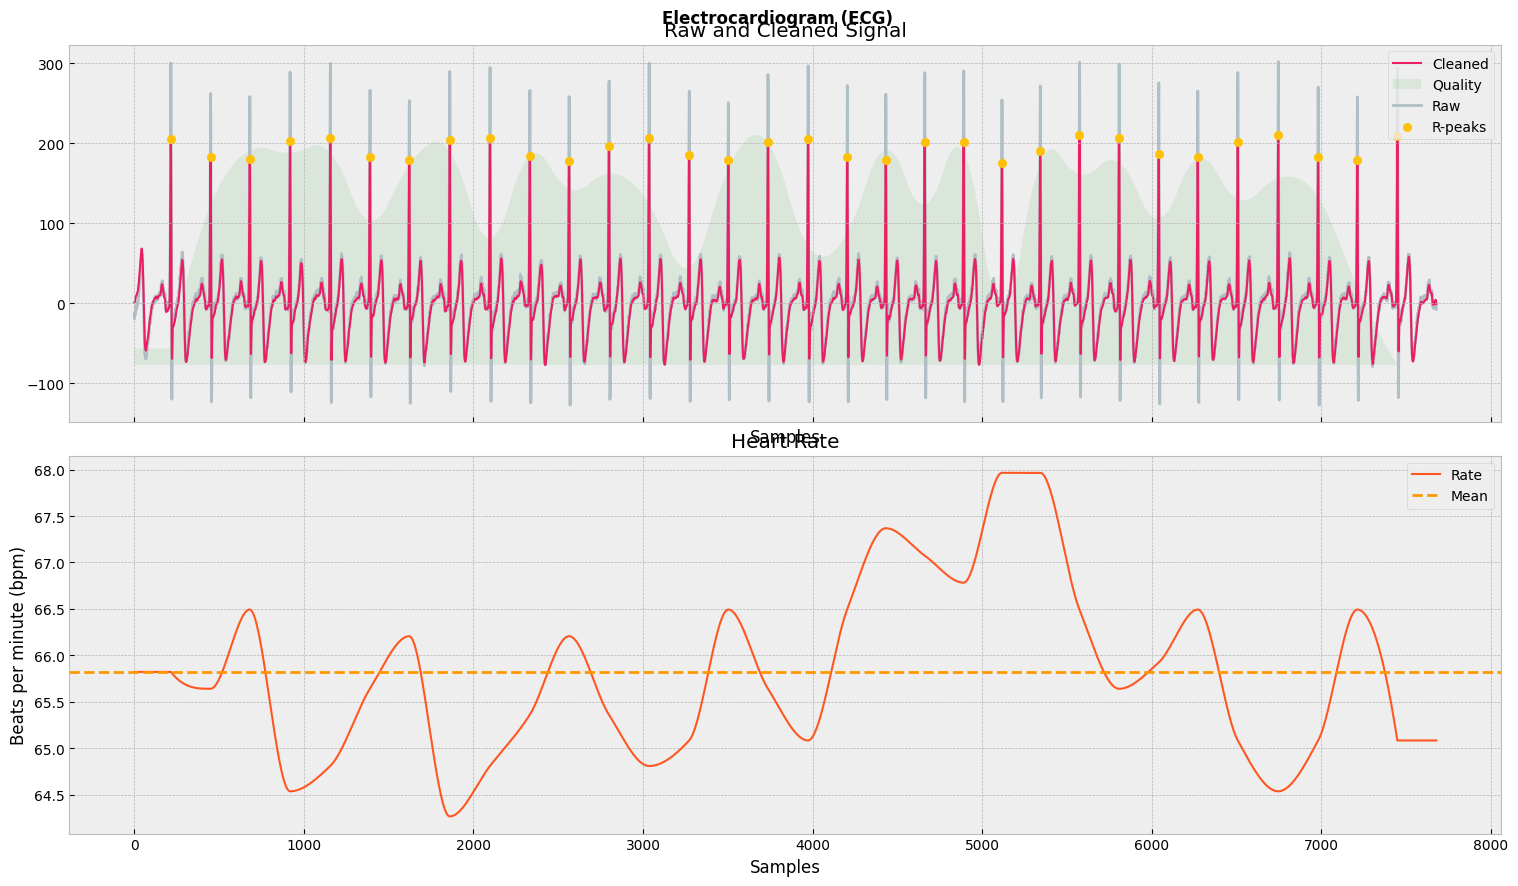

In [22]:
plt.rcParams['figure.figsize'] = [15, 9] 
processed_singal,singal_info = nk.ecg_process(ECG_30s_list[0], sampling_rate=256)

plot = nk.ecg_plot(processed_singal)

In [23]:
print(Y_PSG.shape)
print(Y_Binary_PSG.shape)
print(Y_encode_PSG.shape)
print(X_ECG_30s.shape)


(4213,)
(4213,)
(4213,)
(4213, 7680)


In [24]:
data_length = Y_PSG.shape[0]
print(data_length)
train_length = int(data_length * 0.7)
test_length = data_length - train_length

print(train_length,test_length)

4213
2949 1264


In [72]:
train_ECG_30s = X_ECG_30s[:train_length]
train_PSG_encode = Y_encode_PSG[:train_length]
test_ECG_30s = X_ECG_30s[train_length:]
test_PSG_encode = Y_encode_PSG[train_length:]

In [74]:
print(train_ECG_30s.shape)
print(test_ECG_30s.shape)
print(test_PSG_encode.shape)

(2949, 7680)
(1264, 7680)
(1264,)


In [129]:
train_ECG_30s_tensor = torch.from_numpy(train_ECG_30s).float32()
train_encode_PSG_tensor = torch.from_numpy(train_PSG_encode).long()
test_ECG_30s_tensor = torch.from_numpy(test_ECG_30s).float32()
test_encode_PSG_tensor  = torch.from_numpy(test_PSG_encode).long()

AttributeError: 'Tensor' object has no attribute 'float32'

In [76]:
# data_transforms = transforms.Compose([
#     transforms.ToTensor()
# ])
data_transforms = transforms.Compose([
    transforms.Lambda(lambda x: torch.tensor(x).unsqueeze(0)), # 转换为tensor并增加一个维度
])

In [130]:
class ECGDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        x = torch.tensor(self.x[index], dtype=torch.float32)
        y = torch.tensor(self.y[index], dtype=torch.long)
        return x, y

    def __len__(self):
        return len(self.x)

In [131]:
train_dataset = ECGDataset(train_ECG_30s, train_PSG_encode)
test_dataset = ECGDataset(test_ECG_30s, test_PSG_encode)

In [132]:
train_ECG_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_ECG_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [133]:
print(type(train_ECG_dataloader))

for batch_idx, (data, target) in enumerate(train_ECG_dataloader):
    # get the shape of the data
    print(data.shape)

<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Size([32, 7680])
torch.Si

In [178]:
class ECG_CNN(nn.Module):
    def __init__(self):
        super(ECG_CNN, self).__init__()
        self.conv_pool1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=4, kernel_size=21, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=3, stride=2, padding=1),
        )
        self.fc = nn.Linear(3840 * 4, 5)

    def forward(self, x):
        x = x.reshape(-1, 1, 7680)
        #print(x.shape)
        x = self.conv_pool1(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc(x)
        return x

In [179]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = ECG_CNN().to(device)

In [180]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [181]:
num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_ECG_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 每训练完一个epoch，测试模型性能
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_ECG_dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Epoch %d, Train loss: %.3f, Test accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(train_ECG_dataloader), 100 * correct / total))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x61440 and 1536x5)

In [75]:
def hrv_feature_extraction(ECG_list):    
    ECG_cleaned = nk.ecg_clean(ECG_list, sampling_rate=256, method="pantompkins1985") # cleaning ECG 
    ECG_R_peaks = nk.ecg_findpeaks(ECG_cleaned, method="pantompkins1985") # find the R peaks

    hrv_df = pd.DataFrame(ECG_R_peaks)

    hrv_df["RR Intervals"] = hrv_df["ECG_R_Peaks"].diff() # calculate the value difference between two adjacent points
    hrv_df.loc[0, "RR Intervals"]=hrv_df['ECG_R_Peaks'].values[0]
    # ECG_RR_Inervals_0 = list(ECG_R_peaks[0])
    # ECG_RR_Inervals = ECG_RR_Inervals_0 + nk.hrv_interval(ECG_R_peaks, sampling_rate=256)
    
    clean_rri = hrv_df['RR Intervals'].values
    clean_rri = hrvana.remove_outliers(rr_intervals=clean_rri, low_rri=300, high_rri=2000)
    clean_rri = hrvana.interpolate_nan_values(rr_intervals=clean_rri, interpolation_method="linear")
    clean_rri = hrvana.remove_ectopic_beats(rr_intervals=clean_rri, method="malik")
    clean_rri = hrvana.interpolate_nan_values(rr_intervals=clean_rri, interpolation_method="linear")

    hrv_df["RR Intervals"] = clean_rri 
    hrv_df["RR Intervals"].isna().any()

    nn_epoch = hrv_df['RR Intervals'].values
    #print(nn_epoch)

    #feature_list = []
    all_hr_features = {}
    all_hr_features.update(hrvana.get_time_domain_features(nn_epoch))
    all_hr_features.update(hrvana.get_frequency_domain_features(nn_epoch))
    all_hr_features.update(hrvana.get_poincare_plot_features(nn_epoch))
    all_hr_features.update(hrvana.get_csi_cvi_features(nn_epoch))
    all_hr_features.update(hrvana.get_geometrical_features(nn_epoch))
    del all_hr_features['tinn']

    feature_list = list(all_hr_features.values())
    
    return feature_list

In [76]:
templist = hrv_feature_extraction(ECG_30s_list[0])
print(templist)

0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
[306.3809523809524, 5.43347209872463, 6.587867636800241, 0, 0.0, 0, 0.0, 6.606814663663572, 304.0, 18.0, 0.021564051591068542, 0.017734366501898854, 195.8924119689391, 199.33554817275748, 188.08777429467085, 3.3391664704689408, 0.9267892281175931, 6.652047086739571, 0.13932391277943418, 12.228648167275534, 87.77135183272448, 7.706998600234007, 0.12816228537684277, 4.779341509366943, 6.01690392411913, 1.2589399423177254, 1.2589399423177254, 2.6628611238158157, 30.299682716647336, 1.6153846153846154]


e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 25, using nperseg = 25
  .format(nperseg, input_length))


In [77]:
ECG_30s_features_list = []
for ECG_30s in ECG_30s_list:
    ECG_30s_features = hrv_feature_extraction(ECG_30s)
    ECG_30s_features_list.append(ECG_30s_features)
print(len(ECG_30s_features_list))

0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
2 outlier(s) have been deleted.
The outlier(s) value(s) are : [275.0, 266.0]
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
5 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
5 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have be

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 26, using nperseg = 26
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 28, using nperseg = 28
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 27, using nperseg = 27
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 29, using nperseg = 29
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWa

0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been delet

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 31, using nperseg = 31
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 23, using nperseg = 23
  .format(nperseg, input_length))


2 outlier(s) have been deleted.
The outlier(s) value(s) are : [279.0, 251.0]
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
2 outlier(s) have been deleted.
The outlier(s) value(s) are : [251.0, 272.0]
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been 

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 33, using nperseg = 33
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 19, using nperseg = 19
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
1 outlier(s) have been deleted.
The outlier(s) value(s) are : [259.0]
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been dele

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 32, using nperseg = 32
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
5 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
5 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been delet

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 8, using nperseg = 8
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\hrvanalysis\extract_features.py:542: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_sd2_sd1 = sd2 / sd1
e:\virual_env\CS909\lib\site-packages\hrvanalysis\extract_features.py:491: RuntimeWarning: divide by zero encountered in double_scalars
  csi = L / T
e:\virual_env\CS909\lib\site-packages\hrvanalysis\extract_features.py:492: RuntimeWarning: divide by zero encountered in log10
  cvi = np.log10(L * T)
e:\virual_env\CS909\lib\site-packages\hrvanalysis\extract_features.py:493: RuntimeWarning: divide by zero encountered in double_scalars
  modified_csi = L ** 2 / T
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 10, using nperseg = 10
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
2 outlier(s) have been deleted.
The outlier(s) value(s) are : [295.0, 265.0]
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
2 outlier(s) have been deleted.
The outlier(s) value(s) are : [265.0, 251.0]
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
1 outlier(s) have been deleted.
The outlier(s) value(s) are : [293.0]
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 35, using nperseg = 35
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 34, using nperseg = 34
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been dele

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 5, using nperseg = 5
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been d

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 3, using nperseg = 3
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been 

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 11, using nperseg = 11
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
3 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been del

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 22, using nperseg = 22
  .format(nperseg, input_length))
e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 20, using nperseg = 20
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
5 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
4 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
6 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been delet

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 13, using nperseg = 13
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been de

e:\virual_env\CS909\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 18, using nperseg = 18
  .format(nperseg, input_length))


0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
7 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
8 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
9 ectopic beat(s) have been dele

In [78]:
print(ECG_30s_features_list[0])

[306.3809523809524, 5.43347209872463, 6.587867636800241, 0, 0.0, 0, 0.0, 6.606814663663572, 304.0, 18.0, 0.021564051591068542, 0.017734366501898854, 195.8924119689391, 199.33554817275748, 188.08777429467085, 3.3391664704689408, 0.9267892281175931, 6.652047086739571, 0.13932391277943418, 12.228648167275534, 87.77135183272448, 7.706998600234007, 0.12816228537684277, 4.779341509366943, 6.01690392411913, 1.2589399423177254, 1.2589399423177254, 2.6628611238158157, 30.299682716647336, 1.6153846153846154]


In [79]:
ECG_30s_features_np = np.array(ECG_30s_features_list)
print(ECG_30s_features_np.shape)
#X_train_ECG30_features, X_test_ECG30_features, y_train_binary_PSG, y_test_binary_PSG = train_test_split(ECG_30s_features_np, Y_Binary_PSG, test_size=0.2, random_state=42)

(4863, 30)


In [80]:
# 检查NaN值
def check_Outliers(feature_np):
    nan_values = np.isnan(feature_np)
    nan_indices = np.where(np.isnan(feature_np))
    print("NaN values:", np.sum(nan_values),"index:",nan_indices)

    # 检查无穷大值
    inf_values = np.isinf(feature_np)
    inf_indices = np.where(np.isinf(feature_np))
    print("Infinite values:", np.sum(inf_values),"index:",inf_indices)

    max_value = np.max(feature_np)
    print("Max value:", max_value)

    # nan_indices_list = nan_indices.tolist()
    # inf_indices_list = inf_indices.tolist()
    return nan_indices,inf_indices

In [81]:
ECG_feature_nan_index,ECG_feature_inf_index = check_Outliers(ECG_30s_features_np)
print(ECG_feature_nan_index,ECG_feature_inf_index)


NaN values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Infinite values: 4 index: (array([2120, 2120, 2120, 2120], dtype=int64), array([25, 26, 27, 28], dtype=int64))
Max value: inf
(array([], dtype=int64), array([], dtype=int64)) (array([2120, 2120, 2120, 2120], dtype=int64), array([25, 26, 27, 28], dtype=int64))


In [82]:
ECG_features_with_inf = ECG_feature_inf_index[0].tolist()
ECG_features_inf_no = list(set(ECG_features_with_inf))
print(ECG_features_inf_no)

[2120]


In [89]:
print(ECG_30s_features_np.shape)
ECG_30s_features_np_no_exception = np.delete(ECG_30s_features_np,ECG_features_inf_no,axis=0)

print(ECG_30s_features_np_no_exception.shape)

Y_Binary_PSG_no_exption = np.delete(Y_Binary_PSG,ECG_features_inf_no)
print(Y_Binary_PSG_no_exption.shape)

Y_PSG_no_exption = np.delete(Y_PSG, ECG_features_inf_no)
print(Y_PSG_no_exption.shape)


(4863, 30)
(4862, 30)
(4862,)
(4862,)


In [92]:
def random_forest(features,labels,multiclass):    
    X_train_ECG30_features, X_test_ECG30_features, y_train_binary_PSG, y_test_binary_PSG = train_test_split(features, labels, test_size=0.2, random_state=42)
    x_train_nan_index,x_train_inf_index = check_Outliers(X_train_ECG30_features)
    x_test_nan_index,x_test_inf_index = check_Outliers(X_test_ECG30_features)

    rf_model = RandomForestClassifier()

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(rf_model, param_grid, cv=5)
    grid_search.fit(X_train_ECG30_features, y_train_binary_PSG)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print("Best Parameters:", best_params)
    print("Best Model:", best_model)

    y_pred_binary_PSG = best_model.predict(X_test_ECG30_features)

    accuracy = accuracy_score(y_test_binary_PSG, y_pred_binary_PSG)
    print("Accuracy:", accuracy)
    if multiclass == False:
        f1 = f1_score(y_test_binary_PSG, y_pred_binary_PSG)
        print("F1 Score:", f1)
    else:
        f1 = f1_score(y_test_binary_PSG, y_pred_binary_PSG,average='macro')
        print("F1 Score:", f1)



In [85]:
print(len(Y_Binary_PSG))

4863


In [93]:
random_forest(ECG_30s_features_np_no_exception,Y_Binary_PSG_no_exption,False)

NaN values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Infinite values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Max value: 48808.83070374711
NaN values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Infinite values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Max value: 121638.9538775461
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Model: RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)
Accuracy: 0.880781089414183
F1 Score: 0.17142857142857143


In [94]:
random_forest(ECG_30s_features_np_no_exception, Y_PSG_no_exption,True)

NaN values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Infinite values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Max value: 48808.83070374711
NaN values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Infinite values: 0 index: (array([], dtype=int64), array([], dtype=int64))
Max value: 121638.9538775461


e:\virual_env\CS909\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Model: RandomForestClassifier(max_depth=10, n_estimators=200)
Accuracy: 0.4614594039054471
F1 Score: 0.3244558119279639


In [34]:
print(X_test_ECG30_features)

[[3.06818182e+02 4.85882960e+00 6.97956200e+00 ... 2.57567098e+00
  1.71174288e+01 1.69230769e+00]
 [3.93500000e+02 4.49339021e+01 3.54361711e+01 ... 4.37949214e+00
  5.23327506e+02 6.33333333e+00]
 [3.19380952e+02 3.08443288e+01 3.14959918e+01 ... 4.13303890e+00
  2.41692047e+02 1.40000000e+00]
 ...
 [3.42545455e+02 4.25561000e+01 4.26576840e+01 ... 4.40718499e+00
  3.45111346e+02 2.75000000e+00]
 [3.58166667e+02 5.12826319e+01 4.32348528e+01 ... 4.51609599e+00
  5.45306229e+02 3.50000000e+00]
 [3.86928571e+02 6.16358836e+01 2.47015182e+01 ... 4.38843779e+00
  1.62425819e+03 5.25000000e+00]]


In [44]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [45]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_ECG30_features, y_train_binary_PSG)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [46]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Model: RandomForestClassifier(min_samples_split=5)


In [47]:
y_pred_binary_PSG = best_model.predict(X_test_ECG30_features)

accuracy = accuracy_score(y_test_binary_PSG, y_pred_binary_PSG)
print("Accuracy:", accuracy)

f1 = f1_score(y_test_binary_PSG, y_pred_binary_PSG)
print("F1 Score:", f1)

Accuracy: 0.8236658932714617
F1 Score: 0.10588235294117646


In [ ]:
hrv_df = pd.DataFrame(ECG_R_peaks)

In [ ]:
hrv_df

In [ ]:
hrv_df["RR Intervals"] = hrv_df["ECG_R_Peaks"].diff() # calculate the value difference between two adjacent points
hrv_df.loc[0, "RR Intervals"]=hrv_df.loc[0]['ECG_R_Peaks'] # the first datapoint contain Nan we manually fix it

In [ ]:
hrv_df

In [ ]:
hrvana.plot_timeseries(hrv_df["RR Intervals"].values.tolist()[1:],False) # visualise 90 RR intervals

In [ ]:
clean_rri = hrv_df['RR Intervals'].values
clean_rri = hrvana.remove_outliers(rr_intervals=clean_rri, low_rri=300, high_rri=2000)
clean_rri = hrvana.interpolate_nan_values(rr_intervals=clean_rri, interpolation_method="linear")
clean_rri = hrvana.remove_ectopic_beats(rr_intervals=clean_rri, method="malik")
clean_rri = hrvana.interpolate_nan_values(rr_intervals=clean_rri, interpolation_method="linear")

In [ ]:
hrvana.plot_timeseries(clean_rri[1:])

In [ ]:
hrv_df["RR Intervals"] = clean_rri 
hrv_df["RR Intervals"].isna().any()

In [ ]:
nn_epoch = hrv_df['RR Intervals'].values
print(nn_epoch)
nn_epoch.shape

In [ ]:
hrvana.get_time_domain_features(nn_epoch)

In [ ]:
hrvana.plot_psd(nn_epoch)
hrvana.plot_psd(nn_epoch, method="lomb")

In [ ]:
hrvana.get_frequency_domain_features(nn_epoch)

In [ ]:
hrvana.plot_poincare(nn_epoch)

In [ ]:
hrvana.get_poincare_plot_features(nn_epoch)

In [ ]:
hrvana.get_csi_cvi_features(nn_epoch)

In [ ]:
hrvana.get_geometrical_features(nn_epoch)

In [ ]:
feature_list = []
all_hr_features = {}
all_hr_features.update(hrvana.get_time_domain_features(nn_epoch))
all_hr_features.update(hrvana.get_frequency_domain_features(nn_epoch))
all_hr_features.update(hrvana.get_poincare_plot_features(nn_epoch))
all_hr_features.update(hrvana.get_csi_cvi_features(nn_epoch))
all_hr_features.update(hrvana.get_geometrical_features(nn_epoch))
del all_hr_features['tinn']
feature_list.append(all_hr_features)
print(feature_list)

In [ ]:
Sleep_Physiology_1 = Data_Path+'SN002.edf'
data_1 = pyedflib.EdfReader(Sleep_Physiology_1)

In [ ]:
#singal_num_1 = data_1.signals_in_file()
#signals_in_file是一个属性而不是方法，所以不需要使用括号调用。
singal_num_1 = data_1.signals_in_file
print("signal numbers:", singal_num_1)
print(type(data_1))

In [ ]:
signal_labels_1 = data_1.getSignalLabels()
print("Labels:", signal_labels_1, len(signal_labels_1), sep="\n==========\n")

在常见的情况下，"采样率"和"采样频率"这两个术语可以互换使用，表示每秒钟采集的样本数。它们都用于描述数据采集的速率，指示在单位时间内采集的数据点数量。
然而，在某些特定的技术或领域中，有时可能会区分这两个术语。在这种情况下，"采样率"通常指每秒钟采集的样本数，而"采样频率"指每秒钟采样的次数。采样频率可以高于实际的采样率，因为在某些情况下，每个样本可能由多个采样值组成（例如，使用多路复用技术）。

"physical_max"和"physical_min"是指数据在物理上可测量的最大值和最小值。这些值表示了数据的测量范围，即数据的有效物理范围。
例如，在心电图数据中，电压值以微伏（uV）为单位进行测量。"physical_max"表示测量中记录的最高电压值，而"physical_min"表示测量中记录的最低电压值。这些值有助于解释数据的物理意义，并在后续处理和分析中进行数据归一化或调整。

"digital_max"和"digital_min"指的是数据在数字形式下的最大值和最小值。它们表示数据在存储或传输过程中所采用的数字编码的范围。
在很多情况下，信号或数据会被转换为数字形式进行处理和存储。数字形式的数据使用二进制表示，其中最大值对应于二进制编码的最大值，最小值对应于二进制编码的最小值。
例如，在心电图数据中，数据可能以16位有符号整数的形式进行存储。这种数据编码方式中，"digital_max"表示二进制编码中的最大值，通常为32767（2^15-1），而"digital_min"表示二进制编码中的最小值，通常为-32768（-2^15）。

In [ ]:
signal_sample_1 = data_1.getSampleFrequencies()
print('signal sample 1 shape:',signal_sample_1.shape,'signal sample 1:',signal_sample_1)

signal_headers_1 = data_1.getSignalHeaders()
signal_labels_1 = []
for item in signal_headers_1:
    print("Headers:", item, sep="\n===\n")
    signal_labels_1.append(item['label'])
print(len(signal_headers_1))
print(signal_labels_1)

In [ ]:
sigbufs = np.zeros((singal_num_1, data_1.getNSamples()[0]))
time_duration_1=data_1.getFileDuration()
print('timestart',time_duration_1)

`wfdb.rdsamp` 和 `wfdb.rdrecord` 都是 WFDB 工具箱中用于读取生理信号数据的函数，它们之间的区别在于读取数据的方式和返回值的形式不同。

`wfdb.rdsamp` 函数可以读取一个 WFDB 格式记录的多个信号（如心电图、脑电图等），并将它们存储在 NumPy 数组中返回。该函数返回的是一个包含信号数据和相关元数据信息的元组，其中元组的第一个元素是一个二维 NumPy 数组，存储着所有信号的数据；元组的第二个元素是一个字典，存储着所有信号的元数据信息。

而 `wfdb.rdrecord` 函数只能读取一个 WFDB 格式记录的单个信号，并将其存储在 WFDB Record 类型的对象中返回。这个对象包含信号数据以及相关的元数据信息，如信号名称、采样率、采样起始时间等。

另外，`wfdb.rdsamp` 函数可以通过指定 channels 参数来选择需要读取的信号通道，而 `wfdb.rdrecord` 函数则默认读取记录中的所有信号通道。

In [ ]:
print(singal_num_1)

In [ ]:
temp = data_1.readSignal(0)
print(temp)
print(type(temp))

In [ ]:
for i in range(singal_num_1):
    sigbufs[i, :] = data_1.readSignal(i)
    #print('ooo',sigbufs)

    label = data_1.getLabel(i)
    sample_rate=data_1.getSampleFrequency(i)

#print('sample_rate',sample_rate,type(sample_rate))
print(sigbufs)
# d = list(enumerate(sigbufs[0, 0:int(sample_rate)]))
# print('da',d)

理解心电图等生理信号的信号长度需要考虑信号的采样率和持续时间。在数字信号处理中，信号长度通常用信号中的采样点数来衡量，因为数字信号是以时间离散的形式采集和存储的。

假设心电图信号的采样率为1000Hz（即每秒采集1000个采样点），持续时间为10秒，那么该信号的采样点数为10000个（即1000Hz * 10s）。因此，这个信号的长度为10000个采样点。

需要注意的是，不同的心电图数据集或信号处理任务可能会有不同的采样率和持续时间，因此信号长度也会有所不同。在处理心电图等生理信号时，了解信号的采样率和持续时间非常重要，因为它们直接影响信号的采样点数和信号的频率分辨率。

在本数据集，信号持续时间25650s，采样频率256Hz，其信号长度为两者乘积，即6566400s。

In [ ]:
#plt.plot(*np.array(list(enumerate(sigbufs[7, 0:256]))).T, linestyle='-', linewidth=1, color='dodgerblue')
print(sigbufs.shape)
plt.plot(sigbufs[7,0:7680])
# 显示
plt.show()

Physiology_df = pd.DataFrame(sigbufs.transpose(), columns=signal_labels_1)
Physiology_df.head()
#plot = nk.ecg_plot(sigbufs[7,0:7680])

In [ ]:
signals, info = nk.ecg_process(Physiology_df["ECG"].values, sampling_rate=256) # process ECG for visulisation 

# Visualise the first 5 heart beats. If you want to you plot the entire five minures please remove index selection like plot = nk.ecg_plot(signals)
plot = nk.ecg_plot(signals)

In [ ]:
ECG_1 = sigbufs[7]
print(ECG_1)
print(len(ECG_1))

In [ ]:
sampling_rate = 256  # 采样率为256 Hz
segment_length = 30 * sampling_rate  # 分割长度为30秒的采样点数
segments = []
num_segments = len(ECG_1) // segment_length  # 计算可分割的段数

    # 分割信号
for i in range(num_segments):
    start = i * segment_length  # 分割起始点
    end = (i + 1) * segment_length  # 分割结束点

    segment = ECG_1[start:end]  # 获取分割后的片段
    segments.append(segment)  # 将分割片段添加到列表中
print(segments,len(segments))